# Solar Irradiance

Figure 1.2 from Chapter 1 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of solar irradiance measured by the SOlar Radiation and Climate Experiment 
([SORCE](http://lasp.colorado.edu/home/sorce/)) spacecraft over a roughly 17 year time from 2003 until
the planned end of its mission in 2020 February 25. During the time spanned by this data set, a solar minimum
occurred around the beginning of the year 2009, and we set the time axis to units of decimal years relative to 2009.  

Note that there is a 7-month gap in the SORCE data from 2013 July through 2014 February with a small amount of
data taken in late December 2013.

<img src="./sorce_image.jpg" width="200">

In [18]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter
from astropy.time import Time

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [19]:
plotFile = 'Fig1_2.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## SORCE Raw Data

Read the raw SORCE TIM Total Solar Irradiance data.  Source: http://lasp.colorado.edu/home/sorce/data/.  
This version was downloaded on 2021 July 11.  We used the daily file version 3.19, which includes all data
up to the end of the SORCE mission on 2020 February 25.

We use pandas read_csv() to parse the file, noting that SORCE uses the semicolon (;) as the comment character
(the comment convention from IDL).

We use the [astropy.time](https://docs.astropy.org/en/stable/time/index.html) Time object to convert 
dates and times in the raw data file into decimal years, and use a numpy masked array to plot the 7-month
gap in the data as a gap in the plot.

In [20]:
dataFile = 'sorce_tsi_L3_c24h_latest.txt'

data = pd.read_csv(dataFile,sep=r'\s+',header=None,comment=';')
jd = np.array(data[1])
tsi = np.array(data[4]) 

# Create Time object to allow convenient time units conversion from JD

t = Time(jd,format='jd')

# Convert time in JD to decimal year relative to 2009.9

year = t.decimalyear - 2009.0

# Solar irradiance using a masked array to have a gap where there are no data

irrad = 0.001*np.ma.masked_where(tsi <= 0.0, tsi)

# Limits from the data +/- 0.1 years 

tMin = year.min() - 0.1
tMax = year.max() + 0.1

## Figure 1.2

Plot irradiance in units of 10$^6$ erg/s/cm$^2$ as a function of time in decimal years since 2009 Jan 1,
which is around the time of the last solar minimum.

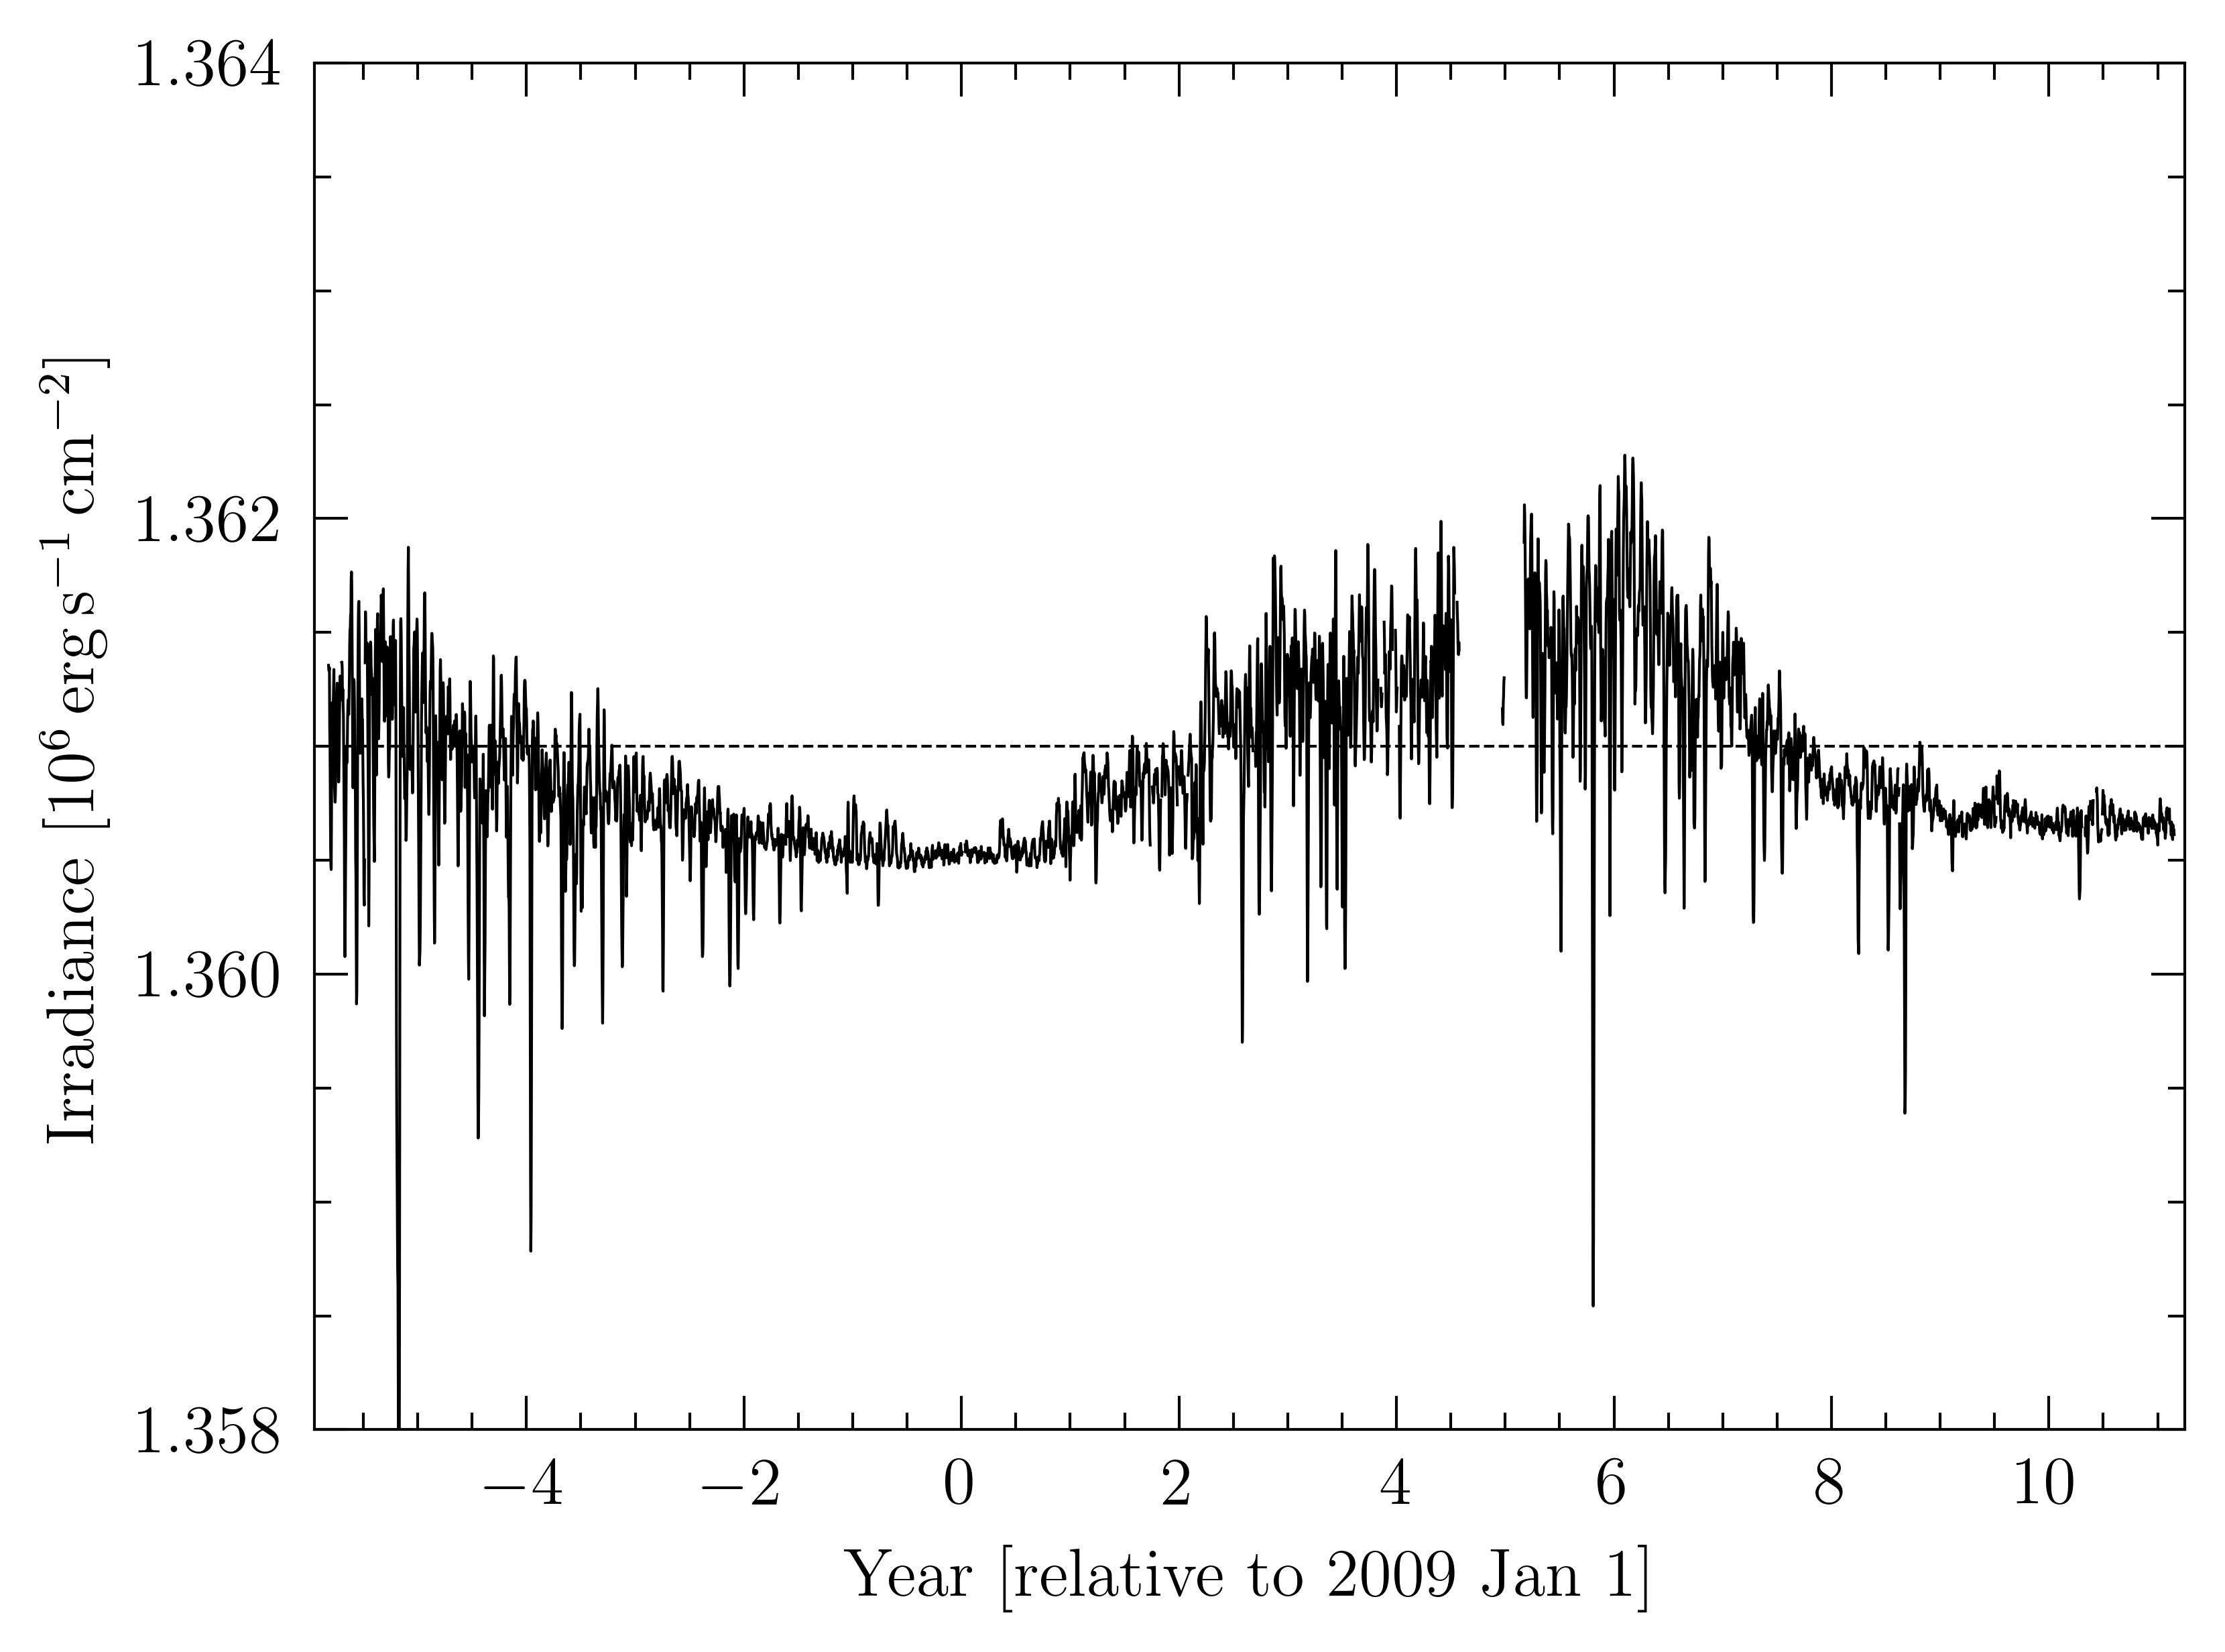

In [21]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(tMin,tMax)
ax.xaxis.set_major_locator(MultipleLocator(2.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_xlabel(r'Year [relative to 2009 Jan 1]',fontsize=axisFontSize)

ax.set_ylim(1.358,1.364)
ax.yaxis.set_major_locator(MultipleLocator(0.002))
ax.yaxis.set_minor_locator(MultipleLocator(0.0005))
ax.set_ylabel(r'Irradiance [10$^{6}$\,erg\,s$^{-1}$\,cm$^{-2}$]',fontsize=axisFontSize)

ax.plot(year,irrad,'-',color='black',lw=0.5,zorder=10)
ax.plot([tMin,tMax],[1.361,1.361],'--',color='black',lw=0.5)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')